In [1]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import requests
from timeit import default_timer as timer
import os
import re
import json
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Gather

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

In [4]:
image_predictions_df = pd.read_csv(file_name, sep='\t')

In [5]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [8]:
df_list = []

with open ('tweet-json.txt', 'r') as file:
    for f in file:
        tweet= json.loads(f)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        df_list.append({'tweet_id':tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
        
api_df = pd.DataFrame(df_list, columns=['tweet_id','retweet_count','favorite_count'])

In [9]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Assess

In [10]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
archive_df.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Damon        1
Rooney       1
Pluto        1
Timber       1
Dewey        1
Name: name, Length: 957, dtype: int64

In [14]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
image_predictions_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [18]:
api_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [19]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Quality issues
### archive_df
1- Dogs classifications(doggo,floofer,pupper,puppo) most of it has null values as none 

2-tweet_id column type need to be adjusted to string instead of int

3- min in dominator column is zero 

4- we dont want retweets just original tweets 

5- names in name column some are uppercase and some are lowercase

6- timestamp type need to be changed to datetime

7- expanded_urls column has 59 nulls
### image_predictions_df
8- tweet_id need to be string not int

9- we have 2075 tweets while in archive_df we have 2356 tweets 
### api_df 
10 - tweet_id type need to be string not int 

## Tidness issues
1- in archive_df table columns doggo, floofer, pupper, puppo can combined in one column(dog_classification)
2- api_df should be a part of archive_df
 

# Clean

In [10]:
archive_df_clean = archive_df.copy()
image_clean =  image_predictions_df.copy()
api_df_clean = api_df.copy()

### -we have 2075 tweets in image_predictions table while in archive_df we have 2356 tweets
 
### -`expanded_urls` column in archive_df has 59 nulls
 ### Define
 -we will adjust the archive_df table with the number of image_prediction to be sure that we have tweets with photos 
 
 -drop expanded_urls nulls


## Code

In [11]:
tweets_with_image = list(image_clean.tweet_id.unique())
len(tweets_with_image) == archive_df_clean.tweet_id.isin(tweets_with_image).sum()

True

In [12]:
archive_df_clean = archive_df_clean[archive_df_clean.tweet_id.isin(tweets_with_image)]

## Test

In [13]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

### we dont want retweets just original tweets

## Define
Remove the retweets and the replies from dataset

## Code

In [14]:
retweet_entries = archive_df_clean.retweeted_status_id.notnull()
archive_df_clean[retweet_entries].shape[0]

81

In [15]:
archive_df_clean = archive_df_clean[~retweet_entries]

In [16]:
replies_entries = archive_df_clean.in_reply_to_status_id.notnull()
archive_df_clean[replies_entries].shape[0]

23

In [17]:
archive_df_clean = archive_df_clean[~replies_entries]

In [18]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

In [19]:
np.logical_not(image_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Name: tweet_id, Length: 2075, dtype: bool

In [20]:
image_clean = image_clean[~np.logical_not(image_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))]

In [21]:
archive_df_clean= archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

## Test

In [22]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


### -Dogs classifications(doggo,floofer,pupper,puppo) most of it has null values as none

### -in archive_df table columns doggo, floofer, pupper, puppo can combined in one column(dog_classification)

## Define
-Replace none to empty string then nan so we can manipulate with it easily

-put doggo,floofer,puppo in one column 

## Code

In [23]:
archive_df_clean['doggo'] = archive_df_clean['doggo'].replace('None', '')
archive_df_clean['floofer'] = archive_df_clean['floofer'].replace('None', '')
archive_df_clean['pupper'] = archive_df_clean['pupper'].replace('None', '')
archive_df_clean['puppo'] = archive_df_clean['puppo'].replace('None', '')

In [24]:
archive_df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
569,801958328846974976,2016-11-25 01:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ronnie. He hopes you're having a great...,https://twitter.com/dog_rates/status/801958328...,12,10,Ronnie,,,,
2196,668852170888998912,2015-11-23 18:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobb. Bobb is a Golden High Fescu...,https://twitter.com/dog_rates/status/668852170...,11,10,Bobb,,,,
2290,667171260800061440,2015-11-19 02:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenneth. He likes Reese's Puffs. ...,https://twitter.com/dog_rates/status/667171260...,10,10,Kenneth,,,,
719,783391753726550016,2016-10-04 19:42:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Godi. He's an avid beachgoer and part tim...,https://twitter.com/dog_rates/status/783391753...,13,10,Godi,,,,
1252,710844581445812225,2016-03-18 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Staniel. His selfie game is strong af....,https://twitter.com/dog_rates/status/710844581...,10,10,Staniel,,,,


In [25]:
archive_df_clean['dog_classification'] = archive_df_clean['doggo']+archive_df_clean['floofer']+archive_df_clean['pupper']+archive_df_clean['puppo']

In [26]:
archive_df_clean= archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [27]:
archive_df_clean= archive_df_clean.replace(r'^\s*$', np.nan, regex=True)

In [28]:
archive_df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_classification
2271,667495797102141441,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,NaN
1633,684241637099323392,2016-01-05 05:14:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Obi. He got camera shy. 12/10 https://...,https://twitter.com/dog_rates/status/684241637...,12,10,Obi,NaN
2010,672248013293752320,2015-12-03 02:56:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10/10 for dog. 7/10 for cat. 12/10 for human. ...,https://twitter.com/dog_rates/status/672248013...,10,10,None,NaN
1918,674271431610523648,2015-12-08 16:56:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""AT DAWN, WE RIDE""\n10/10 for both dogs https:...",https://twitter.com/dog_rates/status/674271431...,10,10,None,NaN
622,796080075804475393,2016-11-08 20:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yogi. He's 98% floof. Snuggable af. 12...,https://twitter.com/dog_rates/status/796080075...,12,10,Yogi,NaN


In [29]:
archive_df_clean.loc[archive_df_clean.dog_classification == 'doggopupper', 'dog_classification'] = 'doggo, pupper'
archive_df_clean.loc[archive_df_clean.dog_classification == 'doggopuppo', 'dog_classification'] = 'doggo, puppo'
archive_df_clean.loc[archive_df_clean.dog_classification == 'doggofloofer', 'dog_classification'] = 'doggo, floofer'

## Test

In [36]:
archive_df_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_classification
1537,689877686181715968,2016-01-20 18:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Durg. He's trying to conquer his fear ...,https://twitter.com/dog_rates/status/689877686...,9,10,Durg,NaN
2313,666739327293083650,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lugan. He is a Bohemian Rhapsody. Very...,https://twitter.com/dog_rates/status/666739327...,10,10,Lugan,NaN
992,748692773788876800,2016-07-01 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,https://twitter.com/dog_rates/status/748692773...,10,10,his,doggo
1013,747219827526344708,2016-06-27 00:07:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Atticus. He's remaining calm but his c...,https://twitter.com/dog_rates/status/747219827...,11,10,Atticus,NaN
883,760252756032651264,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,NaN
1890,674767892831932416,2015-12-10 01:49:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup was carefully tossed to make it look ...,https://twitter.com/dog_rates/status/674767892...,12,10,None,NaN
593,798925684722855936,2016-11-16 16:28:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadow. He's a firm believer that they...,https://twitter.com/dog_rates/status/798925684...,11,10,Shadow,NaN
1319,706516534877929472,2016-03-06 16:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please enjoy this pup in a cooler. Permanently...,https://twitter.com/dog_rates/status/706516534...,12,10,None,NaN
987,749036806121881602,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,NaN
1161,723912936180330496,2016-04-23 16:34:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sugar. She's a Bolivian Superfloof. Sp...,https://twitter.com/dog_rates/status/723912936...,12,10,Sugar,NaN


In [37]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   dog_classification  303 non-null    object
dtypes: int64(3), object(6)
memory usage: 154.0+ KB


### api_df should be a part of archive_df

## Define
Merge the api_df table to the achive_df table

## Code

In [38]:
archive_df_master = pd.merge(archive_df_clean, api_df_clean, on='tweet_id', how='left')

## Test

In [39]:
archive_df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_classification,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048


In [46]:
archive_df_master.dog_classification.value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_classification, dtype: int64

###  -tweet_id column type need to be adjusted to string instead of int in archive_df_master

### -tweet_id column type need to be adjusted to string instead of int in image_predictions

## Define
Change the type of tweet_id column to string

## Code

In [40]:
archive_df_master.tweet_id = archive_df_master.tweet_id.astype(str)

In [41]:
image_clean.tweet_id = image_clean.tweet_id.astype(str)

### Test

In [42]:
archive_df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   object
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   dog_classification  303 non-null    object
 9   retweet_count       1971 non-null   int64 
 10  favorite_count      1971 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 184.8+ KB


In [43]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   object 
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


### - min in  rating_dominator column is zero in archive_df and it isnot reasonable 

## Define
Put a reasonable value to a dominator(10) instead of zero

## Code

In [66]:
archive_df_master.rating_denominator = archive_df_master.rating_denominator.replace(0, 10)

In [67]:
archive_df_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1971.000000,1971.000000,1971.000000,1971.000000
mean,12.223237,10.477423,2784.449518,8949.106545
std,41.634034,6.853275,4697.662893,12267.799790
min,0.000000,2.000000,16.000000,81.000000
25%,10.000000,10.000000,628.500000,1997.000000
50%,11.000000,10.000000,1367.000000,4147.000000
75%,12.000000,10.000000,3239.000000,11402.500000
max,1776.000000,170.000000,79515.000000,132810.000000


### -timestamp column  type need to be changed to datetime

## Define
Adjust the type of timestamp column in archive_df to be datetime

## Code


In [68]:
archive_df_master.timestamp = pd.to_datetime(archive_df_master.timestamp)

## Test

In [69]:
archive_df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_classification  303 non-null    object             
 9   retweet_count       1971 non-null   int64              
 10  favorite_count      1971 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 184.8+ KB


### -names in name column some are uppercase and some are lowercase

## Define
change names in name column in archive_df to lowercase

## Code

In [73]:
archive_df_master.name = archive_df_master.name.str.lower()

## Test

In [78]:
archive_df_master.name.str.islower().sum()

1971

### The most appropriate data type for the rating_numerator column should be float

## Define
Change the type of rating_numerator column to float

## Code

In [47]:
archive_df_master.rating_numerator = archive_df_master.rating_numerator.astype(float)

## Test

In [48]:
archive_df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   object 
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   float64
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   dog_classification  303 non-null    object 
 9   retweet_count       1971 non-null   int64  
 10  favorite_count      1971 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 184.8+ KB


# Store

In [50]:
archive_df_master.to_csv('twitter_archive_master1.csv', index=False)

In [51]:
image_clean.to_csv('image_predictions2.csv', index=False)

# Analyze

# Visualization

In [52]:
archive_df_master.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_classification,retweet_count,favorite_count
1494,675483430902214656,2015-12-12 01:12:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Rare shielded battle dog here. Very happy abou...,https://twitter.com/dog_rates/status/675483430...,5.0,10,None,NaN,1081,1985


In [53]:
dog_retweet = archive_df_master.groupby('dog_classification').retweet_count.mean()

In [54]:
dog_retweet

dog_classification
doggo              7125.698413
doggo, floofer     3433.000000
doggo, pupper      4397.250000
doggo, puppo      19196.000000
floofer            4968.714286
pupper             2382.502488
puppo              6473.954545
Name: retweet_count, dtype: float64

In [55]:
dog_favorite = archive_df_master.groupby('dog_classification').favorite_count.mean()

In [56]:
dog_favorite

dog_classification
doggo             19356.380952
doggo, floofer    17169.000000
doggo, pupper     13219.875000
doggo, puppo      47844.000000
floofer           13206.000000
pupper             7250.527363
puppo             21582.090909
Name: favorite_count, dtype: float64

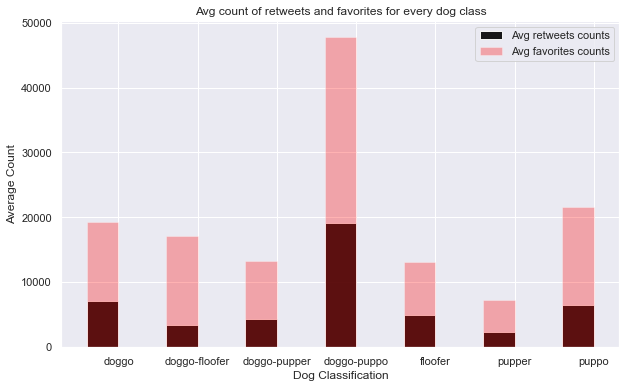

In [57]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})

ind = np.arange(len(dog_favorite))
width = 0.4
retweet_bars = plt.bar(ind, dog_retweet, width, color='black', alpha=.9, label='Avg retweets counts')
favorite_bars = plt.bar(ind, dog_favorite, width, color='red', alpha=.3, label='Avg favorites counts')
plt.ylabel('Average Count')
plt.xlabel('Dog Classification')
plt.title('Avg count of retweets and favorites for every dog class')
locations = ind + width / 2
labels = ['doggo', 'doggo-floofer', 'doggo-pupper', 'doggo-puppo', 'floofer', 'pupper', 'puppo']


plt.xticks(locations, labels)
plt.legend()


In [58]:
dog_class_count = archive_df_master.groupby('dog_classification').tweet_id.count()

In [59]:
dog_class_count

dog_classification
doggo              63
doggo, floofer      1
doggo, pupper       8
doggo, puppo        1
floofer             7
pupper            201
puppo              22
Name: tweet_id, dtype: int64

In [60]:
archive_df_master['rating'] = archive_df_master['rating_numerator']/archive_df_master['rating_denominator']

In [61]:
class_rating = archive_df_master.groupby('dog_classification').rating.mean()

In [62]:
class_rating

dog_classification
doggo             1.188889
doggo, floofer    1.100000
doggo, pupper     1.100000
doggo, puppo      1.300000
floofer           1.200000
pupper            1.071642
puppo             1.200000
Name: rating, dtype: float64

## Insights

1- The greatest number of tweets is for `pupper`

2- The greatest number of retweets is for `doggo-puppo`

3- The highest number of favorites is for `doggo-puppo`

4- From average rating  we can see how the dogs are very incredible that all of the classifications have ratings more than 1 (100%). Although `doggo-puppo` has the highest ratings then `puppo` classification
